# A-Data Collection and Preparation

## Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the data set

In [2]:
df=pd.read_csv('anemia.csv')
df.head()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,1,14.9,22.7,29.1,83.7,0
1,0,15.9,25.4,28.3,72.0,0
2,0,9.0,21.5,29.6,71.2,1
3,0,14.9,16.0,31.4,87.5,0
4,1,14.7,22.0,28.2,99.5,0


## Data Preparation

 #### 1- Handling missing values

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      1421 non-null   int64  
 1   Hemoglobin  1421 non-null   float64
 2   MCH         1421 non-null   float64
 3   MCHC        1421 non-null   float64
 4   MCV         1421 non-null   float64
 5   Result      1421 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 66.7 KB


In [4]:
df.shape

(1421, 6)

In [5]:
df.isnull().sum()

Gender        0
Hemoglobin    0
MCH           0
MCHC          0
MCV           0
Result        0
dtype: int64

#### 2- Handling Imbalanced values

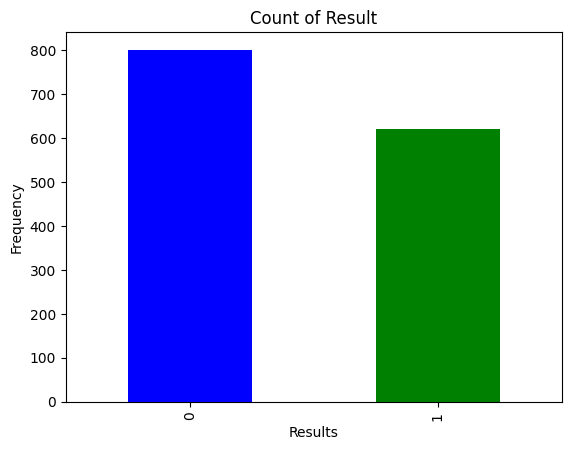

In [6]:
# 0 for not Anemia and 1 for Anemia
# checking for the count of anemia and not anemia
results = df['Result'].value_counts()
results.plot(kind = 'bar',color=['blue','green'])
plt.xlabel('Results')
plt.ylabel('Frequency')
plt.title('Count of Result')
plt.show()

In [7]:
# female count is observed to be more than male so we balance it using undesampling
from sklearn.utils import resample
majorclass = df[df['Result'] == 0]
minorclass = df[df['Result'] == 1]
major_downsample = resample(majorclass, replace=False, n_samples=len(minorclass),random_state=42)
df = pd.concat([major_downsample,minorclass])
df['Result'].value_counts()

Result
0    620
1    620
Name: count, dtype: int64

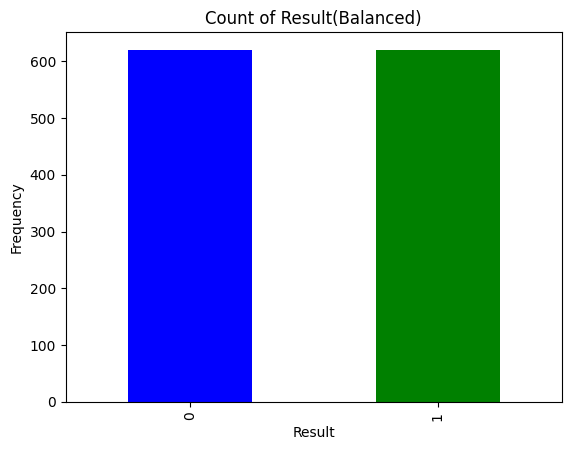

In [8]:
# Plotting the balanced gender counts
result_balanced = df['Result'].value_counts()
result_balanced.plot(kind = 'bar', color = ['blue','green'])
plt.xlabel('Result')
plt.ylabel('Frequency')
plt.title('Count of Result(Balanced)')
plt.show()

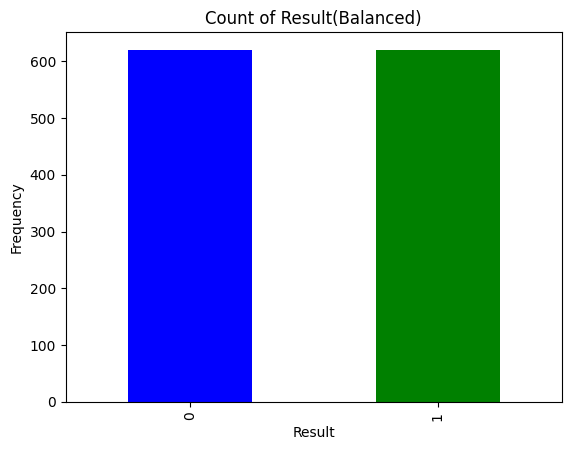

In [10]:
# Plotting the balanced gender counts
result_balanced = df['Result'].value_counts()
result_balanced.plot(kind = 'bar', color = ['blue','green'])
plt.xlabel('Result')
plt.ylabel('Frequency')
plt.title('Count of Result(Balanced)')
plt.show()

# B- Exploratory Data Analysis